# Layoffs Case Study

### Importing necessary libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    

### Data Import

In [135]:
url = "https://raw.githubusercontent.com/neerajcodes888/Data-Science/main/Case%20Study/Recent%20Layoffs%20Analysis/layoffs.csv"

data = pd.read_csv(url)

In [136]:
data.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10%,Media,https://www.calcalistech.com/ctechnews/article...,Post-IPO,$166,United States,8/10/2025
1,Peloton,New York City,NaN,8/7/2025,6%,Fitness,https://www.reuters.com/technology/peloton-cut...,Post-IPO,$1900,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34%,Marketing,https://www.calcalistech.com/ctechnews/article...,Unknown,$436,United States,8/5/2025
3,Windsurf,SF Bay Area,30.0,8/5/2025,NaN,AI,https://techcrunch.com/2025/08/05/three-weeks-...,Acquired,$243,United States,8/10/2025
4,Wondery,Los Angeles,100.0,8/4/2025,NaN,Media,https://variety.com/2025/biz/news/amazon-reorg...,Acquired,$15,United States,8/5/2025


### Let's handle some missing data

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4127 entries, 0 to 4126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4127 non-null   object 
 1   location             4126 non-null   object 
 2   total_laid_off       2689 non-null   float64
 3   date                 4127 non-null   object 
 4   percentage_laid_off  2626 non-null   object 
 5   industry             4125 non-null   object 
 6   source               4124 non-null   object 
 7   stage                4120 non-null   object 
 8   funds_raised         3672 non-null   object 
 9   country              4125 non-null   object 
 10  date_added           4127 non-null   object 
dtypes: float64(1), object(10)
memory usage: 354.8+ KB


### We can remove some unwanted column . Here we can remove source col

In [138]:
data = data.drop('source',axis=1)

In [139]:
data

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10%,Media,Post-IPO,$166,United States,8/10/2025
1,Peloton,New York City,NaN,8/7/2025,6%,Fitness,Post-IPO,$1900,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34%,Marketing,Unknown,$436,United States,8/5/2025
3,Windsurf,SF Bay Area,30.0,8/5/2025,NaN,AI,Acquired,$243,United States,8/10/2025
4,Wondery,Los Angeles,100.0,8/4/2025,NaN,Media,Acquired,$15,United States,8/5/2025
...,...,...,...,...,...,...,...,...,...,...
4122,Service,Los Angeles,NaN,3/16/2020,100%,Travel,Seed,$5,United States,8/31/2020
4123,HopSkipDrive,Los Angeles,8.0,3/13/2020,10%,Transportation,Unknown,$45,United States,4/3/2020
4124,Panda Squad,SF Bay Area,6.0,3/13/2020,75%,Consumer,Seed,$1,United States,4/17/2020
4125,Tamara Mellon,Los Angeles,20.0,3/12/2020,40%,Retail,Series C,$90,United States,3/31/2020


### Now , we can see that source column has been removed.

#### Checking NA or null values

In [140]:
data.isnull()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4122,False,False,True,False,False,False,False,False,False,False
4123,False,False,False,False,False,False,False,False,False,False
4124,False,False,False,False,False,False,False,False,False,False
4125,False,False,False,False,False,False,False,False,False,False


In [141]:
data.isnull().sum()

company                   0
location                  1
total_laid_off         1438
date                      0
percentage_laid_off    1501
industry                  2
stage                     7
funds_raised            455
country                   2
date_added                0
dtype: int64

In [142]:
data.isna()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4122,False,False,True,False,False,False,False,False,False,False
4123,False,False,False,False,False,False,False,False,False,False
4124,False,False,False,False,False,False,False,False,False,False
4125,False,False,False,False,False,False,False,False,False,False


In [143]:
data.isna().sum()

company                   0
location                  1
total_laid_off         1438
date                      0
percentage_laid_off    1501
industry                  2
stage                     7
funds_raised            455
country                   2
date_added                0
dtype: int64

### We can analyse , whether we have to drop rows or replace with needful

In [144]:
data.tail(100)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
4027,Maven,Seattle,31.0,3/30/2020,9%,Media,Post-IPO,$77,United States,4/8/2020
4028,Blume Global,SF Bay Area,30.0,3/30/2020,10%,Logistics,Unknown,NaN,United States,4/1/2020
4029,Catalant,Boston,30.0,3/30/2020,NaN,Other,Series E,$110,United States,3/31/2020
4030,Starship Technologies,"Tallinn,Non-U.S.",30.0,3/30/2020,NaN,Transportation,Series A,$82,Estonia,4/8/2020
4031,Loftsmart,New York City,25.0,3/30/2020,75%,Real Estate,Series A,$18,United States,4/6/2020
...,...,...,...,...,...,...,...,...,...,...
4122,Service,Los Angeles,NaN,3/16/2020,100%,Travel,Seed,$5,United States,8/31/2020
4123,HopSkipDrive,Los Angeles,8.0,3/13/2020,10%,Transportation,Unknown,$45,United States,4/3/2020
4124,Panda Squad,SF Bay Area,6.0,3/13/2020,75%,Consumer,Seed,$1,United States,4/17/2020
4125,Tamara Mellon,Los Angeles,20.0,3/12/2020,40%,Retail,Series C,$90,United States,3/31/2020


### We can remove na values.

In [145]:
data.dropna(inplace=True)

In [146]:
data

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10%,Media,Post-IPO,$166,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34%,Marketing,Unknown,$436,United States,8/5/2025
5,Clear,"Bengaluru,Non-U.S.",145.0,8/1/2025,16%,Finance,Series C,$140,India,8/5/2025
13,ConsenSys,New York City,47.0,7/22/2025,7%,Crypto,Series D,$726,United States,7/22/2025
19,Scale AI,SF Bay Area,200.0,7/16/2025,14%,Data,Series E,$602,United States,7/17/2025
...,...,...,...,...,...,...,...,...,...,...
4120,Inspirato,Denver,130.0,3/16/2020,22%,Travel,Series C,$79,United States,3/31/2020
4121,Help.com,Austin,16.0,3/16/2020,100%,Support,Seed,$6,United States,4/16/2020
4123,HopSkipDrive,Los Angeles,8.0,3/13/2020,10%,Transportation,Unknown,$45,United States,4/3/2020
4124,Panda Squad,SF Bay Area,6.0,3/13/2020,75%,Consumer,Seed,$1,United States,4/17/2020


In [147]:
data[data['country']=='India']

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
5,Clear,"Bengaluru,Non-U.S.",145.0,8/1/2025,16%,Finance,Series C,$140,India,8/5/2025
53,Otipy,"New Delhi,Non-U.S.",300.0,5/23/2025,100%,Food,Series B,$44,India,5/26/2025
68,GenWise,"New Delhi,Non-U.S.",15.0,5/5/2025,20%,Other,Seed,$3,India,5/5/2025
182,ShareChat,"Bengaluru,Non-U.S.",27.0,1/15/2025,5%,Marketing,Series D,$222,India,1/16/2025
299,BeepKart,"Bengaluru,Non-U.S.",130.0,10/8/2024,40%,Retail,Series A,$19,India,10/9/2024
...,...,...,...,...,...,...,...,...,...,...
3884,Meesho,"Bengaluru,Non-U.S.",200.0,4/8/2020,28%,Retail,Series D,$215,India,4/10/2020
3978,Instamojo,"Bengaluru,Non-U.S.",6.0,4/2/2020,6%,Finance,Unknown,$8,India,4/12/2020
3992,Acko,"Mumbai,Non-U.S.",45.0,4/1/2020,9%,Finance,Unknown,$143,India,4/8/2020
4024,FabHotels,"New Delhi,Non-U.S.",80.0,3/30/2020,20%,Travel,Series B,$48,India,4/10/2020


### Insted of Bengaluru,Non-U.S,  let's keep  Bengaluru as it's own city

In [148]:
data["location"] = data["location"].str.replace(",Non-U.S.", "", regex=False)


In [149]:
data.shape

(1688, 10)

In [150]:
data.isnull().sum()

company                0
location               0
total_laid_off         0
date                   0
percentage_laid_off    0
industry               0
stage                  0
funds_raised           0
country                0
date_added             0
dtype: int64

## Now Start our study

### 1. How many layoffs occurred in total across all companies?


In [151]:
data['total_laid_off'].sum()

np.float64(516759.0)

### Total Layoffs happened = 516759

### 2. Which company had the highest number of layoffs?


In [152]:
data.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(3)

company
Intel        37000.0
Microsoft    25305.0
Amazon       18000.0
Name: total_laid_off, dtype: float64

In [153]:
data[data['company']=='Intel']

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
83,Intel,Sacramento,22000.0,4/23/2025,20%,Hardware,Post-IPO,$12,United States,4/23/2025
394,Intel,SF Bay Area,15000.0,8/1/2024,15%,Hardware,Post-IPO,$12,United States,8/1/2024


### As we can see that , Intel has highest layoffs during whole period

Text(0, 0.5, 'Total Laid Offs')

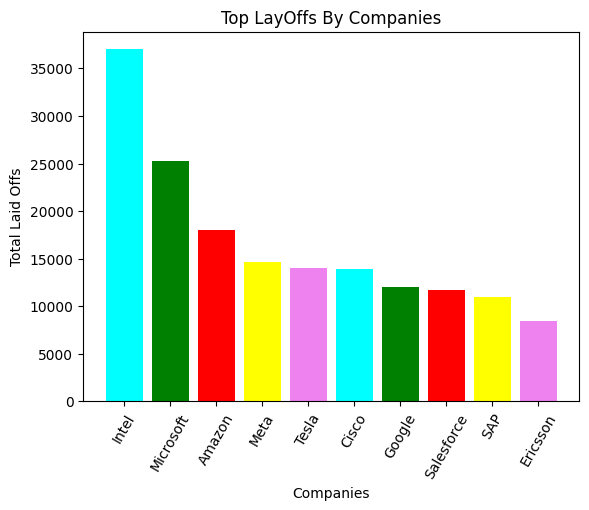

In [154]:
val = data.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)
plt.bar(val.index,val.values,color=['cyan','green','red','yellow','violet'])
plt.xticks(rotation=60)
plt.title("Top LayOffs By Companies")
plt.xlabel('Companies')
plt.ylabel('Total Laid Offs') 

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1688 entries, 0 to 4125
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1688 non-null   object 
 1   location             1688 non-null   object 
 2   total_laid_off       1688 non-null   float64
 3   date                 1688 non-null   object 
 4   percentage_laid_off  1688 non-null   object 
 5   industry             1688 non-null   object 
 6   stage                1688 non-null   object 
 7   funds_raised         1688 non-null   object 
 8   country              1688 non-null   object 
 9   date_added           1688 non-null   object 
dtypes: float64(1), object(9)
memory usage: 145.1+ KB


In [156]:
data['percentage_laid_off'].isna().sum()

np.int64(0)

In [157]:
data['percentage_laid_off'] = data['percentage_laid_off'].str.replace('%', '', regex=False)

In [158]:
data['percentage_laid_off']=data['percentage_laid_off'].astype(int)

### What is the average percentage of layoffs across all companies?

In [159]:
round(data['percentage_laid_off'].mean(),2)

np.float64(22.02)

### Here we can see that , The avarage layoffs during whole is around 22%

In [160]:
data.head(3)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10,Media,Post-IPO,$166,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34,Marketing,Unknown,$436,United States,8/5/2025
5,Clear,Bengaluru,145.0,8/1/2025,16,Finance,Series C,$140,India,8/5/2025


<span style='red'> Now, let's see that Which industry saw the highest total layoffs? <span>


In [161]:
data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(3)


industry
Other             65630.0
Transportation    52363.0
Retail            50719.0
Name: total_laid_off, dtype: float64

### Let's visualize this

In [162]:
visuals = data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)
x,y = visuals.index,visuals.values

Text(0, 0.5, 'Industries')

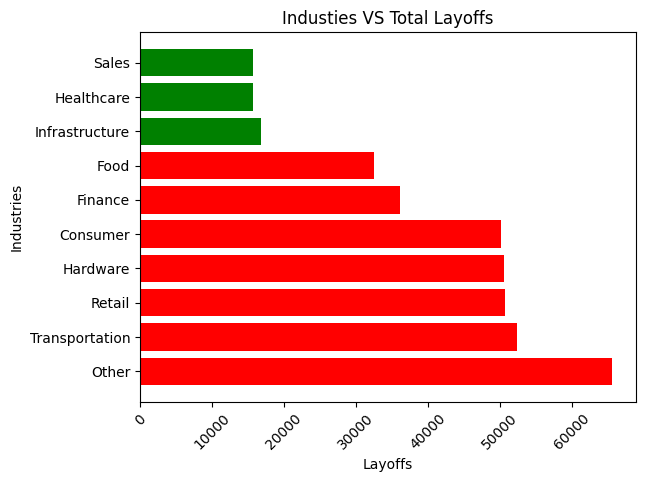

In [163]:
plt.barh(x,y,color=['green' if val < 30000 else 'red' for val in y])
plt.xticks(rotation=45)
plt.title('Industies VS Total Layoffs')
plt.xlabel('Layoffs')
plt.ylabel('Industries')

### Now ,  Which month had the highest number of layoffs?


In [164]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


In [165]:
data.groupby(data['date'].dt.month_name())['total_laid_off'].sum().sort_values(ascending=False)

date
January      96595.0
April        77887.0
November     58695.0
May          53796.0
February     53636.0
August       42147.0
June         32544.0
July         31224.0
March        29684.0
October      17416.0
December     13915.0
September     9220.0
Name: total_laid_off, dtype: float64

####   - **Diagram:** Line chart of layoffs over months.


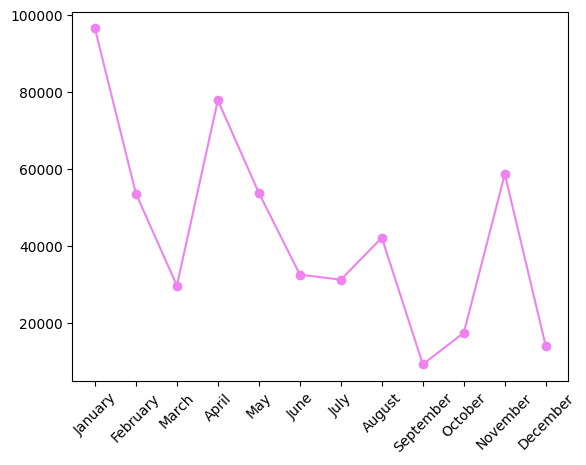

In [166]:
lc = data.groupby([data['date'].dt.month, data['date'].dt.month_name()])['total_laid_off'].sum().sort_index()

x, y = lc.index.get_level_values(1), lc.values  # Use month_name for x-axis
plt.plot(x, y, color='violet', marker='o')
plt.xticks(rotation=45)
plt.show()


### Can be clearly seen that January is the month of highest layoffs with a huge amount

### Let's Identify trends in layoffs over the months—are they increasing or decreasing?

In [167]:
data.groupby([data['date'].dt.month, data['date'].dt.month_name()])['total_laid_off'].rolling(window=2).mean()

date  date          
1     January   170       NaN
                174     225.0
                176     183.0
                177      88.0
                182      68.5
                        ...  
12    December  2347    105.0
                2349     74.0
                2350     42.5
                3450    468.5
                3493    510.0
Name: total_laid_off, Length: 1688, dtype: float64

### Let's visualize this

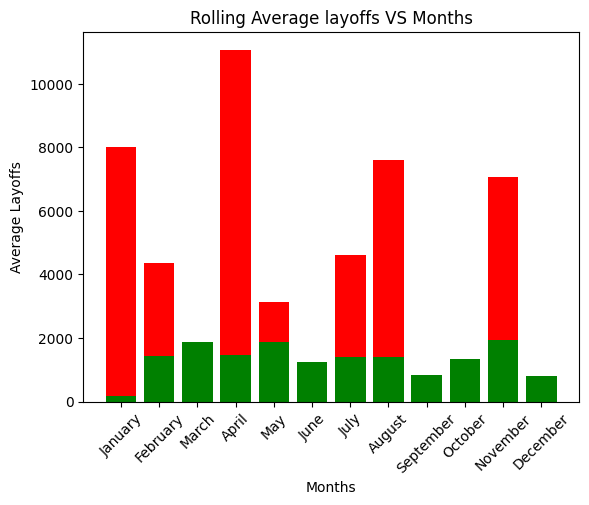

In [168]:
lc = data.groupby([data['date'].dt.month, data['date'].dt.month_name()])['total_laid_off'].rolling(window=2).mean()

x, y = lc.index.get_level_values(1), lc.values  
plt.bar(x, y, color=['green' if val < 2000 else 'red' for val in y])
plt.xlabel('Months')
plt.ylabel('Average Layoffs')
plt.title('Rolling Average layoffs VS Months')
plt.xticks(rotation=45)
plt.show()


### Can be seen that layoff is decresing at the end of every quarter like March,June,September , December

### Let's Find the earliest and latest layoff events in the dataset.


In [169]:
data.sort_values(by='date').head(1)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
4125,Tamara Mellon,Los Angeles,20.0,2020-03-12,40,Retail,Series C,$90,United States,2020-03-31


In [170]:
data.sort_values(by='date').tail(1)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,2025-08-07,10,Media,Post-IPO,$166,United States,2025-08-10


### 9. Which week of the year saw the most layoffs?


In [171]:
data.groupby(data['date'].dt.isocalendar().week.sort_values())['total_laid_off'].sum().sort_values(ascending=False)

week
17    36280.0
3     31404.0
16    23988.0
46    21013.0
1     20678.0
31    20081.0
7     19626.0
4     18896.0
45    18874.0
19    17570.0
6     16654.0
27    14911.0
44    13289.0
20    12521.0
5     12410.0
21    11834.0
32    11808.0
14    11407.0
18    11214.0
2     10900.0
8     10384.0
13     8800.0
23     8607.0
10     8258.0
15     7890.0
28     7313.0
22     7244.0
9      7132.0
24     6889.0
49     6769.0
48     6540.0
26     6531.0
25     6397.0
52     6250.0
41     5600.0
30     5392.0
40     5020.0
35     4306.0
12     4022.0
34     3913.0
39     3753.0
33     3130.0
50     3032.0
37     2969.0
29     2674.0
42     2659.0
43     2539.0
47     1961.0
36     1886.0
11     1567.0
51     1422.0
38      552.0
Name: total_laid_off, dtype: float64

In [172]:
import seaborn as sns

Text(0, 0.5, 'Week')

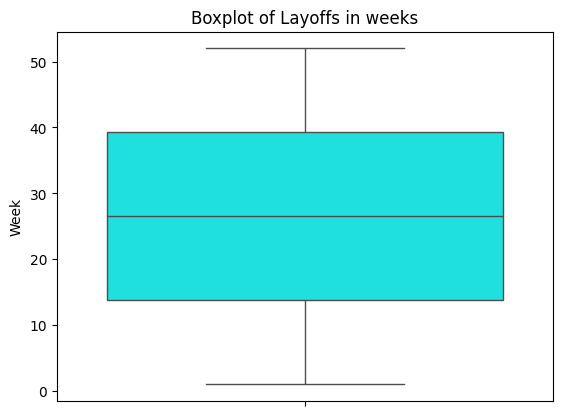

In [173]:
box = data.groupby(data['date'].dt.isocalendar().week.sort_values())['total_laid_off'].sum().sort_values(ascending=False)
sns.boxplot(box.index,color='cyan',patch_artist=True)
plt.title('Boxplot of Layoffs in weeks')
plt.ylabel('Week')

### As we can see this, that most of the layoffs happened from 15th to nearly 40th week.

### Let's Compare layoffs between 2025 and 2024—how did they change?


In [174]:
data_2025=data[data['date'].dt.year==2025]
data_2024=data[data['date'].dt.year==2024]

In [175]:
months = np.arange(1, 13)

data_2024_1 = (
    data_2024.groupby(data_2024['date'].dt.month)['total_laid_off']
    .sum()
    .reindex(months, fill_value=0)
)

data_2025_1 = (
    data_2025.groupby(data_2025['date'].dt.month)['total_laid_off']
    .sum()
    .reindex(months, fill_value=0)
)

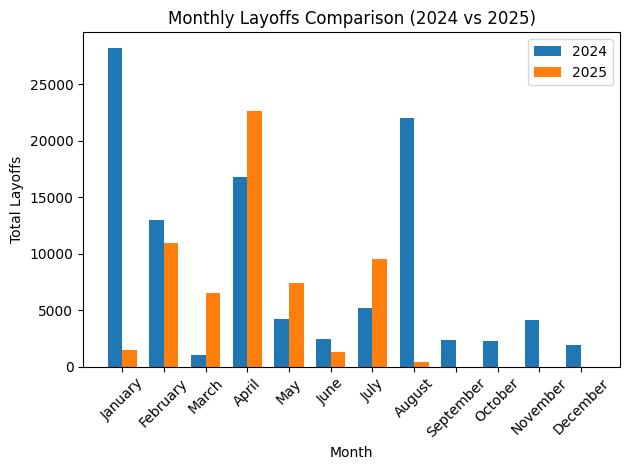

In [176]:

x = np.arange(len(months))
width = 0.35

# Plot
plt.bar(x - width/2, data_2024_1.values, width, label='2024')
plt.bar(x + width/2, data_2025_1.values, width, label='2025')

# Month names for xticks
plt.xticks(x, pd.to_datetime(months, format='%m').month_name(), rotation=45)

plt.xlabel("Month")
plt.ylabel("Total Layoffs")
plt.title("Monthly Layoffs Comparison (2024 vs 2025)")
plt.legend()
plt.tight_layout()
plt.show()


### Now, let's discuss, Which city had the highest total layoffs?


In [177]:
data.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head(5)

location
SF Bay Area      184813.0
Seattle           54391.0
New York City     28686.0
Sacramento        22065.0
Bengaluru         19969.0
Name: total_laid_off, dtype: float64

### Can be clearly seen that SF Bay Area has the highest no. of layoffs dueing whole

Text(0.5, 1.0, 'City VS Layoffs')

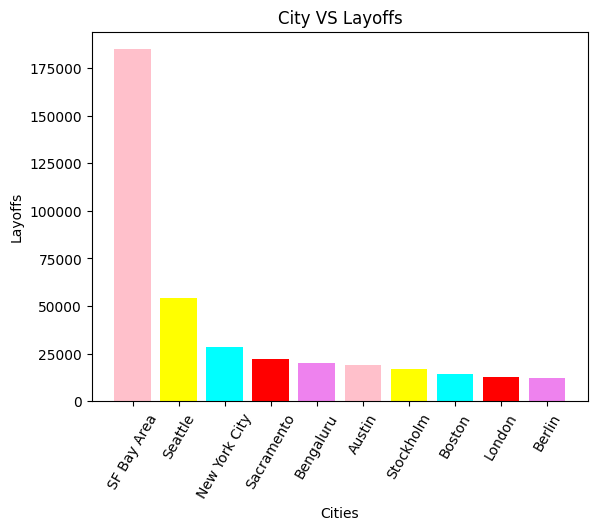

In [178]:
visuals = data.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head(10)
x,y = visuals.index,visuals.values
plt.bar(x,y,color=['pink','yellow','cyan','red','violet'])
plt.xticks(rotation=60)
plt.xlabel('Cities')
plt.ylabel('Layoffs')
plt.title('City VS Layoffs')

### Now , Comparing layoffs between the United States and India.

In [179]:
data.head(1)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,2025-08-07,10,Media,Post-IPO,$166,United States,2025-08-10


In [180]:
data[data['country']=='India']

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
5,Clear,Bengaluru,145.0,2025-08-01,16,Finance,Series C,$140,India,2025-08-05
53,Otipy,New Delhi,300.0,2025-05-23,100,Food,Series B,$44,India,2025-05-26
68,GenWise,New Delhi,15.0,2025-05-05,20,Other,Seed,$3,India,2025-05-05
182,ShareChat,Bengaluru,27.0,2025-01-15,5,Marketing,Series D,$222,India,2025-01-16
299,BeepKart,Bengaluru,130.0,2024-10-08,40,Retail,Series A,$19,India,2024-10-09
...,...,...,...,...,...,...,...,...,...,...
3884,Meesho,Bengaluru,200.0,2020-04-08,28,Retail,Series D,$215,India,2020-04-10
3978,Instamojo,Bengaluru,6.0,2020-04-02,6,Finance,Unknown,$8,India,2020-04-12
3992,Acko,Mumbai,45.0,2020-04-01,9,Finance,Unknown,$143,India,2020-04-08
4024,FabHotels,New Delhi,80.0,2020-03-30,20,Travel,Series B,$48,India,2020-04-10


In [181]:
data[data['country']=='United States'].count()

company                1085
location               1085
total_laid_off         1085
date                   1085
percentage_laid_off    1085
industry               1085
stage                  1085
funds_raised           1085
country                1085
date_added             1085
dtype: int64

In [182]:
data['date'].dt.year.unique()

array([2025, 2024, 2023, 2022, 2021, 2020], dtype=int32)